In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

data = pd.read_csv('train.csv')

In [7]:
data = np.array(data)
m, n = data.shape
np.random.shuffle(data) # shuffle before splitting into dev and training sets

data_dev = data[0:1000].T
Y_dev = data_dev[0]
X_dev = data_dev[1:n]
X_dev = X_dev / 255.

data_train = data[1000:m].T # transposing as well
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train / 255.
_,m_train = X_train.shape

The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.


In [8]:
Y_train

array([4, 8, 0, ..., 2, 3, 9])

In [12]:
def init_params():
    W1 = np.random.rand(10, 784) - 0.5
    b1 = np.random.rand(10, 1) - 0.5
    W2 = np.random.rand(10, 10) - 0.5
    b2 = np.random.rand(10, 1) - 0.5
    return W1, b1, W2, b2

def ReLU(Z):
    return np.maximum(Z, 0)

def softmax(Z):
    A = np.exp(Z) / sum(np.exp(Z))
    return A
    
def forward_prop(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

def ReLU_deriv(Z):
    return Z > 0

def backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * ReLU_deriv(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)
    return dW1, db1, dW2, db2

def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1    
    W2 = W2 - alpha * dW2  
    b2 = b2 - alpha * db2    
    return W1, b1, W2, b2

In [13]:
def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

def gradient_descent(X, Y, alpha, iterations):
    W1, b1, W2, b2 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if i % 10 == 0:
            print("Iteration: ", i)
            predictions = get_predictions(A2)
            print(get_accuracy(predictions, Y))
    return W1, b1, W2, b2

In [15]:
W1, b1, W2, b2 = gradient_descent(X_train, Y_train,0.10, 500)

Iteration:  0
[1 9 9 ... 8 8 3] [4 8 0 ... 2 3 9]
0.12363414634146341
Iteration:  10
[2 1 3 ... 2 8 3] [4 8 0 ... 2 3 9]
0.21480487804878048
Iteration:  20
[2 1 3 ... 8 8 3] [4 8 0 ... 2 3 9]
0.2931219512195122
Iteration:  30
[6 1 3 ... 2 8 5] [4 8 0 ... 2 3 9]
0.356390243902439
Iteration:  40
[6 1 3 ... 2 8 5] [4 8 0 ... 2 3 9]
0.391
Iteration:  50
[6 1 3 ... 2 8 5] [4 8 0 ... 2 3 9]
0.41836585365853657
Iteration:  60
[6 8 3 ... 2 8 5] [4 8 0 ... 2 3 9]
0.4444390243902439
Iteration:  70
[6 8 3 ... 2 8 3] [4 8 0 ... 2 3 9]
0.46539024390243905
Iteration:  80
[6 8 3 ... 2 8 3] [4 8 0 ... 2 3 9]
0.486390243902439
Iteration:  90
[6 8 3 ... 2 8 9] [4 8 0 ... 2 3 9]
0.5104146341463415
Iteration:  100
[4 8 3 ... 2 8 9] [4 8 0 ... 2 3 9]
0.5388536585365854
Iteration:  110
[4 8 3 ... 2 8 9] [4 8 0 ... 2 3 9]
0.5645365853658536
Iteration:  120
[4 8 3 ... 2 8 9] [4 8 0 ... 2 3 9]
0.5887317073170731
Iteration:  130
[4 8 3 ... 2 8 9] [4 8 0 ... 2 3 9]
0.6118048780487805
Iteration:  140
[4 8 0 ... 2

In [17]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Prediction:  [6]
Label:  6


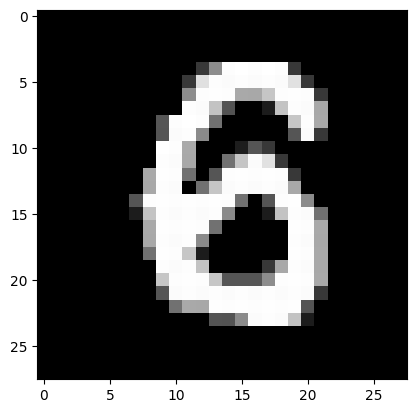

In [19]:
test_prediction(5,W1,b1,W2,b2)

Prediction:  [3]
Label:  3


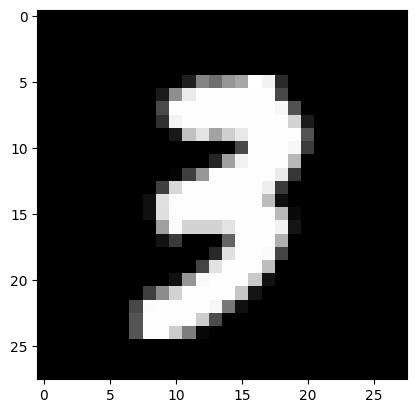

In [20]:
test_prediction(23,W1,b1,W2,b2)

Prediction:  [9]
Label:  9


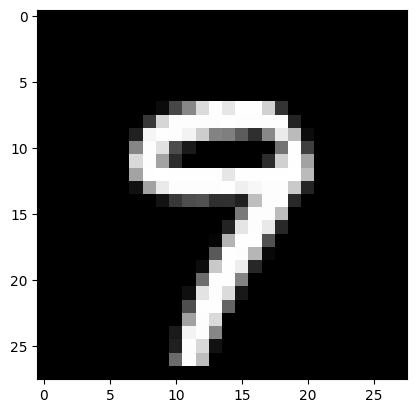

In [21]:
test_prediction(500,W1,b1,W2,b2)

Prediction:  [7]
Label:  2


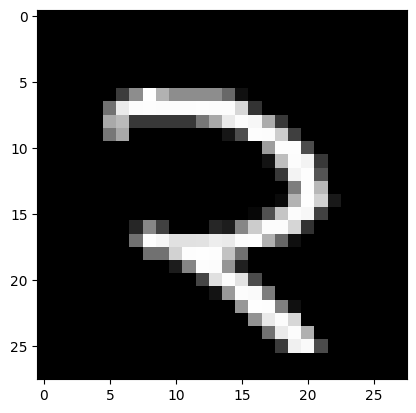

In [22]:
test_prediction(5555,W1,b1,W2,b2)

In [23]:
dev_predictions = make_predictions(X_dev, W1, b1, W2, b2)
get_accuracy(dev_predictions, Y_dev)


[2 6 7 3 5 2 1 6 3 1 9 1 7 3 3 9 2 1 3 3 0 7 8 4 5 9 8 8 6 1 8 0 7 0 3 9 3
 1 6 4 2 7 9 1 8 1 7 3 0 5 3 2 9 6 9 2 7 0 6 1 9 3 1 6 4 5 2 5 1 5 0 2 4 8
 2 6 4 6 1 4 9 6 3 4 6 0 1 6 1 1 1 2 9 8 9 2 3 0 2 9 3 6 6 6 0 7 4 7 9 4 7
 8 2 6 7 5 2 4 4 6 0 0 9 9 6 9 6 6 9 9 0 3 5 9 9 1 7 0 5 5 6 6 7 7 9 3 5 6
 5 3 3 0 7 7 8 7 4 1 2 9 9 6 7 1 6 9 1 9 1 9 5 4 7 0 5 1 2 5 2 9 9 4 1 1 9
 5 7 4 8 2 7 3 3 2 1 2 7 2 0 4 2 9 6 0 1 6 5 2 9 3 6 3 4 4 3 8 2 7 2 9 3 9
 7 3 6 2 9 7 0 7 8 9 2 7 5 1 6 3 0 1 6 3 3 4 0 0 7 5 8 0 0 6 0 9 1 2 8 3 8
 6 5 0 2 5 5 3 4 2 1 2 9 8 1 4 1 3 0 1 1 1 4 0 4 9 7 2 4 4 7 9 1 7 3 9 2 7
 5 4 3 5 0 1 6 5 1 4 6 8 3 7 6 1 8 4 0 3 6 2 2 9 7 5 1 4 8 9 0 5 7 8 5 2 7
 4 6 9 4 5 4 8 1 8 2 9 8 9 9 9 6 8 0 1 6 6 1 7 2 1 8 7 9 6 2 0 2 5 0 2 6 4
 5 3 4 0 2 2 2 9 7 2 1 8 8 9 8 7 0 1 1 5 4 4 2 7 0 5 6 1 5 0 4 4 7 0 2 2 6
 1 5 8 5 2 9 1 3 3 9 0 3 9 0 1 4 4 4 7 6 0 8 5 4 1 6 7 0 6 4 9 9 6 8 5 0 2
 1 5 0 1 8 6 8 1 6 2 9 8 3 6 3 6 7 8 4 7 2 2 8 5 5 1 6 7 7 4 4 5 3 6 9 3 3
 4 6 2 0 7 6 5 2 8 4 9 7 

np.float64(0.852)